In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse
import inference
import cluster

%load_ext autoreload
%autoreload 2

In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')

basic_line_color = '#808080'
black = '#222222'
darkgray = '#A9A9A9'
highlight = '#00B2EE'

#color0 = '#7570b3'
#color1 = '#d95f02'
#color3 = '#1b9e77'

color0 = '#1f78b4'
color1 = '#b2df8a'
color2 = '#a6cee3'

plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=16)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['lines.markersize'] = 12

%config InlineBackend.figure_format = 'retina'

In [3]:
A = sparse.load_npz('A_matrix.npz')
H = sparse.load_npz('H_matrix.npz')

In [4]:
parameters = {}
parameters['reps'] = 10
parameters['noise'] = 2e-2
parameters['BHnorm'] = False
parameters['Lnorm'] = False
hier = inference.infer_hierarchy(A, parameters=parameters)

number of groups = 27
[27]
[27, 9]
[27, 9, 3]
selected == []  []


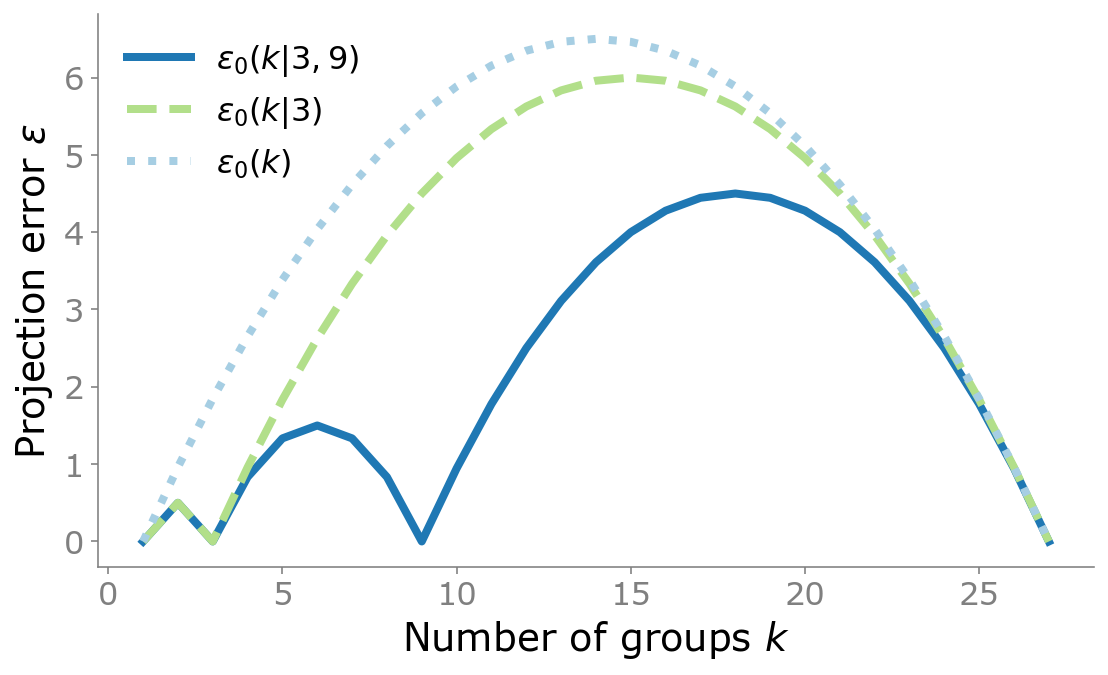

In [5]:
# plot expected error
errs = []
err0 = inference.expected_errors_random_projection([1,27])
err1 = inference.expected_errors_random_projection([1,3,27])
err2 = inference.expected_errors_random_projection([1,9,27])
err3 = inference.expected_errors_random_projection([1,3,9,27])
x = np.arange(1,28)
plt.plot(x, err3, color=color0)
plt.plot(x, err1, '--', color=color1)
plt.plot(x, err0, ':', color=color2)

plt.xlabel(r'Number of groups $k$')
plt.ylabel(r'Projection error $\epsilon$')
plt.legend([r'$\epsilon_0(k|3,9)$',r'$\epsilon_0(k|3)$',r'$\epsilon_0(k)$'], frameon=False)
plt.tight_layout()
plt.savefig('expected_errors.pdf')

In [6]:
Ks = [9, 21]
partition = hier[0]
Eagg, Nagg = partition.count_links_between_groups(A)
Aagg = Eagg / Nagg
partition_list, all_errors = inference.identify_next_level(Aagg, Ks, reps=1000, norm=False)

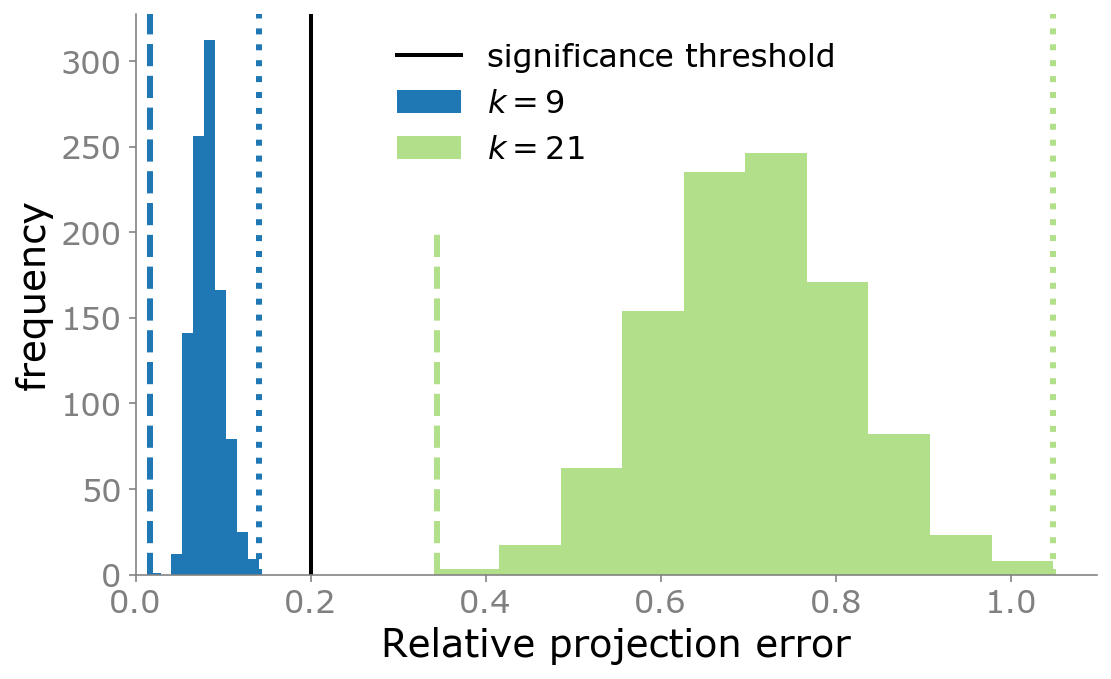

In [7]:
exp_err0 = err1[Ks[0]-1]
exp_err1 = err1[Ks[1]-1]
norm_errors = np.copy(all_errors)
norm_errors[0] /= exp_err0
norm_errors[1] /= exp_err1
max_error0 = np.max(norm_errors[0])
max_error1 = np.max(norm_errors[1])
plt.hist(norm_errors[0], color=color0, label=f'$k={Ks[0]}$')
plt.hist(norm_errors[1], color=color1, label=f'$k={Ks[1]}$')
plt.axvline(max_error0, ls=':', color=color0, lw=3)
plt.axvline(max_error1, ls=':', color=color1, lw=3)
plt.axvline(norm_errors[0][-1], ls='--', color=color0, lw=3)
plt.plot([norm_errors[1][-1],norm_errors[1][-1]], [0,200], ls='--', color=color1, lw=3)
plt.axvline(0.2, color='k', lw=2, label='significance threshold')
plt.xlim(0,max_error1+0.05)
plt.xlabel('Relative projection error')
plt.ylabel('frequency')
plt.legend(frameon=False, loc=9)
plt.tight_layout()
plt.savefig('perturbation_errors.pdf')

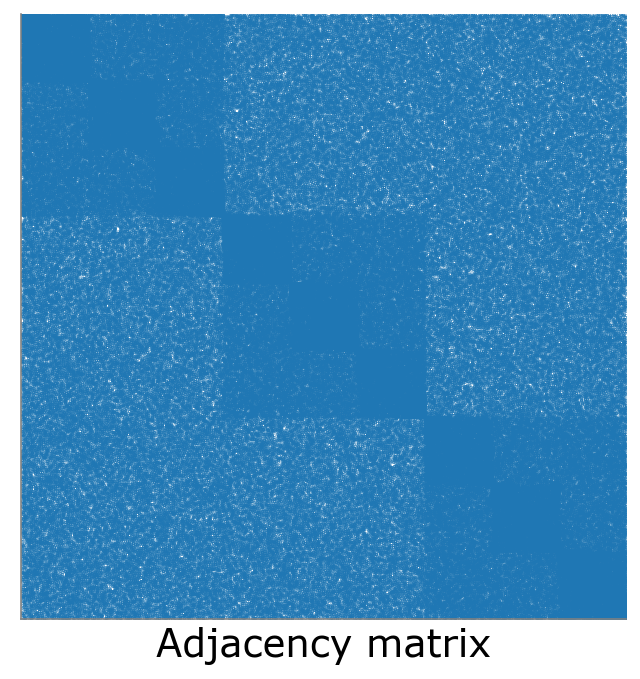

In [8]:
fig = plt.figure(figsize=(5, 5))
plt.spy(A, ms=.05, rasterized=True)
plt.xticks([])
plt.yticks([])
plt.xlabel('Adjacency matrix')
plt.tight_layout()
fig.savefig('spy_A333.pdf', dpi=100)

In [9]:
err1[8], err1[20]

(4.5, 4.5)

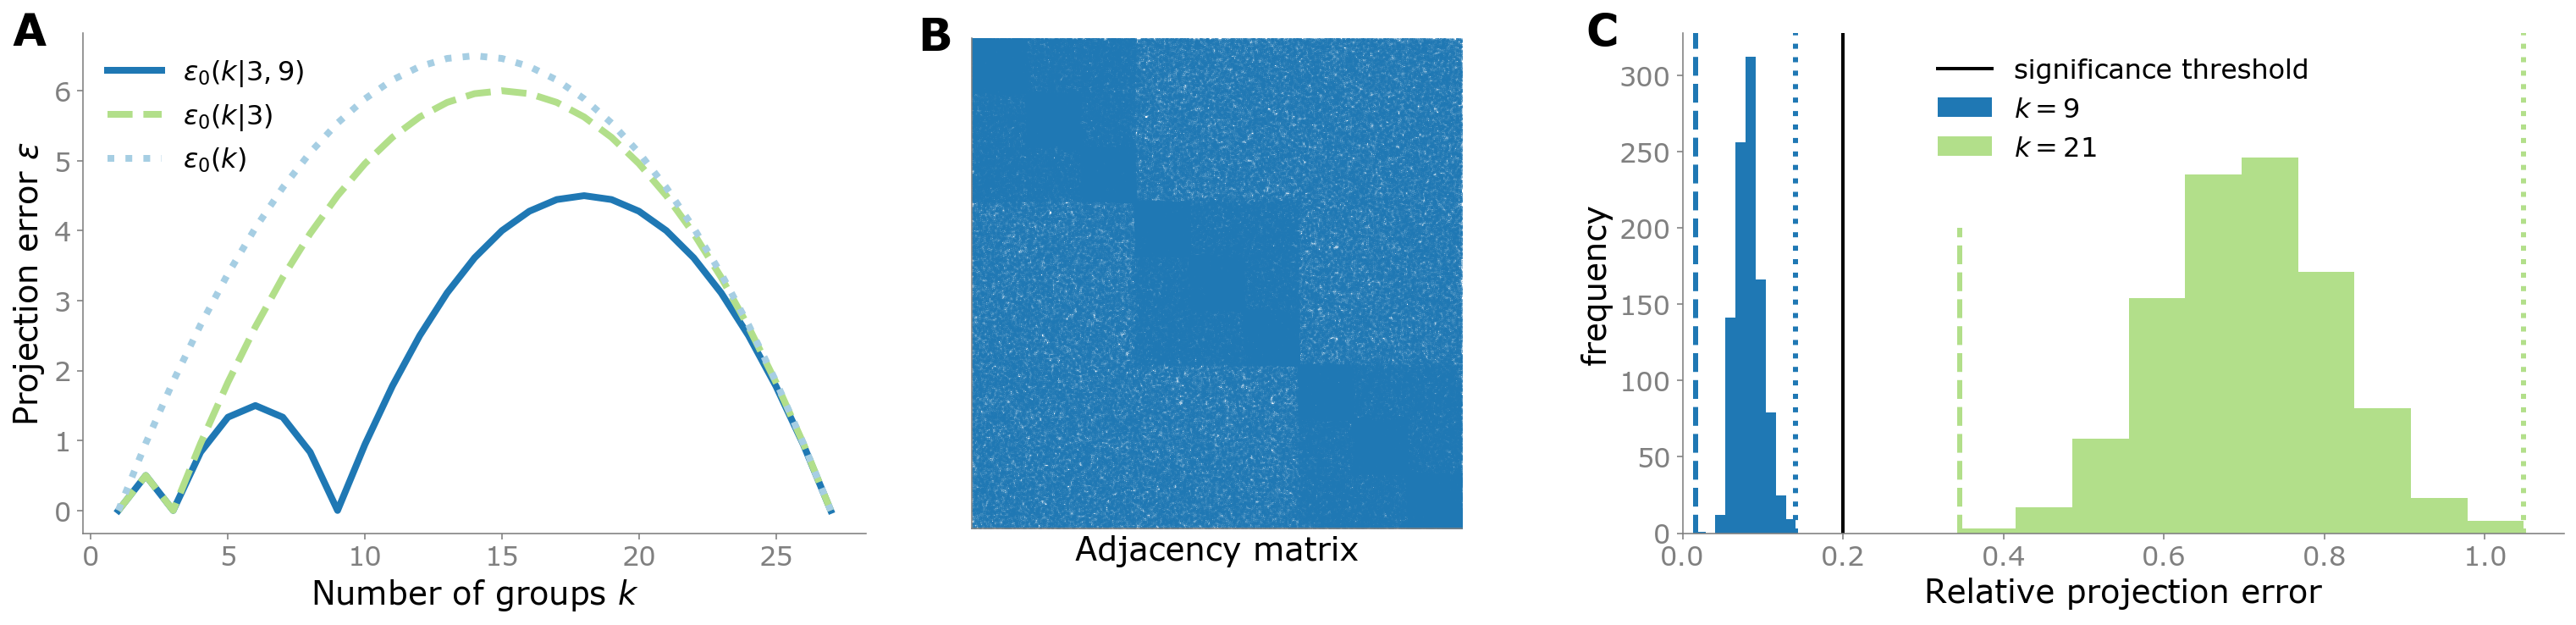

In [23]:
fig = plt.figure(figsize=(21, 5))
widths = [8, 5, .1, 9]
heights = [5]
spec5 = fig.add_gridspec(ncols=4, nrows=1, width_ratios=widths,
                           height_ratios=heights)
row = 0

col=0
ax = fig.add_subplot(spec5[row, col])
# plot expected error
errs = []
err0 = inference.expected_errors_random_projection([1,27])
err1 = inference.expected_errors_random_projection([1,3,27])
err2 = inference.expected_errors_random_projection([1,9,27])
err3 = inference.expected_errors_random_projection([1,3,9,27])
x = np.arange(1,28)
plt.plot(x, err3, color=color0)
plt.plot(x, err1, '--', color=color1)
plt.plot(x, err0, ':', color=color2)

plt.xlabel(r'Number of groups $k$')
plt.ylabel(r'Projection error $\epsilon$')
plt.legend([r'$\epsilon_0(k|3,9)$',r'$\epsilon_0(k|3)$',r'$\epsilon_0(k)$'], frameon=False)
ax.annotate('A', (-0.09, 1), xycoords='axes fraction', va='center', size=26, weight='bold')

col=1
ax = fig.add_subplot(spec5[row, col])

plt.spy(A, ms=.05, rasterized=True, color=color0)
plt.xticks([])
plt.yticks([])
plt.xlabel('Adjacency matrix')
ax.annotate('B', (-0.11, 1), xycoords='axes fraction', va='center', size=26, weight='bold')

col=2
ax = fig.add_subplot(spec5[row, col])
# ax.set_visible = False
ax.set_xticks([])
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

col=3
ax = fig.add_subplot(spec5[row, col])

norm_errors = np.copy(all_errors)
norm_errors[0] /= exp_err0
norm_errors[1] /= exp_err1
exp_err0 = err1[Ks[0]-1]
exp_err1 = err1[Ks[1]-1]
max_error0 = np.max(norm_errors[0])
max_error1 = np.max(norm_errors[1])
plt.hist(norm_errors[0], color=color0, label=f'$k={Ks[0]}$')
plt.hist(norm_errors[1], color=color1, label=f'$k={Ks[1]}$')
plt.axvline(max_error0, ls=':', color=color0, lw=3)
plt.axvline(max_error1, ls=':', color=color1, lw=3)
plt.axvline(norm_errors[0][-1], ls='--', color=color0, lw=3)
plt.plot([norm_errors[1][-1],norm_errors[1][-1]], [0,200], ls='--', color=color1, lw=3)
plt.axvline(0.2, color='k', lw=2, label='significance threshold')
plt.xlim(0,max_error1+0.05)
plt.xlabel('Relative projection error')
plt.ylabel('frequency')
plt.legend(frameon=False, loc=9)
ax.annotate('C', (-0.11, 1), xycoords='axes fraction', va='center', size=26, weight='bold')

fig.tight_layout(pad=0.1)
plt.savefig('model_select.pdf')
plt.savefig('model_select.svg')